Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.18.0
358233/358233 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
118774/118774 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4179
1392


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 500, 50)             │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8502 - loss: 0.4456 - val_accuracy: 0.9522 - val_loss: 0.2897
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9171 - loss: 0.2444 - val_accuracy: 0.9665 - val_loss: 0.1704
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9618 - loss: 0.1598 - val_accuracy: 0.9785 - val_loss: 0.0896
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9802 - loss: 0.0789 - val_accuracy: 0.9856 - val_loss: 0.0660
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9838 - loss: 0.0531 - val_accuracy: 0.9725 - val_loss: 0.0832
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9747 - loss: 0.0947
Loss: 0.093, Accuracy: 0.976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
(0.00038537287, 'ham')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━

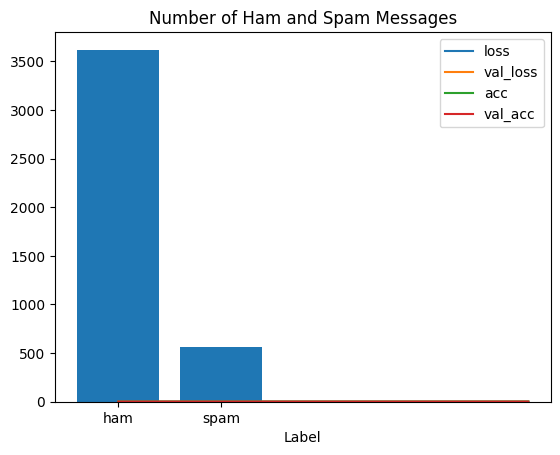

In [2]:
# Import necessary libraries and handle environment-specific setups
try:
    # The %tensorflow_version command is specific to Colab. It's used to set TensorFlow's version.
    %tensorflow_version 2.x
except Exception:
    pass  # Handle environments where %tensorflow_version might not work (e.g., local machines)

# Import TensorFlow, pandas, and other necessary libraries.
import tensorflow as tf  # TensorFlow library for deep learning models.
import pandas as pd  # pandas is used for data manipulation and handling tabular data.
from tensorflow import keras  # High-level API for building deep learning models in TensorFlow.

# Install TensorFlow datasets for easier access to machine learning datasets.
!pip install tensorflow-datasets
import tensorflow_datasets as tfds  # Library for dataset loading and manipulation.

# Import additional libraries for numerical operations and plotting.
import numpy as np  # Used for handling arrays and matrices.
import matplotlib.pyplot as plt  # Used for creating plots and visualizations.

# Check and print the installed version of TensorFlow.
print(tf.__version__)

# Define the URLs to download the training and test datasets.
TRAIN_DATA_URL = "https://raw.githubusercontent.com/beaucarnes/fcc_python_curriculum/master/sms/train-data.tsv"
TEST_DATA_URL = "https://raw.githubusercontent.com/beaucarnes/fcc_python_curriculum/master/sms/valid-data.tsv"

# Download the datasets from the URLs and save them to local paths.
train_file_path = tf.keras.utils.get_file("train-data.tsv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("valid-data.tsv", TEST_DATA_URL)

# Load the training dataset into a pandas DataFrame. Use '\t' as separator for TSV (tab-separated values).
df_train = pd.read_csv(train_file_path, sep="\t", header=None, names=['y', 'x'])
df_train.head()  # Display the first few rows of the training dataset.

# Load the testing dataset into a pandas DataFrame in a similar way.
df_test = pd.read_csv(test_file_path, sep="\t", header=None, names=['y', 'x'])
df_test.head()  # Display the first few rows of the testing dataset.

# Print the length of both the training and testing datasets.
print(len(df_train))
print(len(df_test))

# Convert the 'y' column labels ('ham' or 'spam') to categorical numeric values.
y_train = df_train['y'].astype('category').cat.codes  # Convert 'ham' and 'spam' to numeric codes.
y_test = df_test['y'].astype('category').cat.codes  # Apply the same transformation to the test set.
y_train[:5]  # Preview the first few values of the target labels.

# Visualize the distribution of the labels in the training set.
bar = df_train['y'].value_counts()  # Count occurrences of 'ham' and 'spam'.
plt.bar(bar.index, bar)  # Create a bar chart showing the counts.
plt.xlabel('Label')  # Set label for the x-axis.
plt.title('Number of Ham and Spam Messages')  # Set the title for the plot.

# Import NLTK (Natural Language Toolkit) for text processing tasks.
import nltk
nltk.download('stopwords')  # Download the list of common stopwords in English.
nltk.download('wordnet')  # Download WordNet lexicon for lemmatization tasks.

# Import regular expressions and NLTK tools for text cleaning and preprocessing.
import re  # Python's built-in library for regular expressions.
from nltk.stem import WordNetLemmatizer  # For lemmatizing words (reducing to base form).
from nltk.corpus import stopwords  # For access to stopword list.

# Initialize the stopwords set for English.
stopwords_eng = set(stopwords.words('english'))
len(stopwords_eng)  # Print the number of stopwords in the English list.

# Initialize the WordNet lemmatizer.
lemmatizer = WordNetLemmatizer()

# Define a function to clean and preprocess text data: remove unwanted characters and perform lemmatization.
def clean_txt(txt):
    txt = re.sub(r'([^\s\w])+', ' ', txt)  # Replace non-alphanumeric characters with spaces.
    txt = " ".join([lemmatizer.lemmatize(word) for word in txt.split() if not word in stopwords_eng])  # Lemmatize and remove stopwords.
    txt = txt.lower()  # Convert text to lowercase.
    return txt  # Return the cleaned text.

# Apply the text cleaning function to the 'x' column in the training dataset.
X_train = df_train['x'].apply(lambda x: clean_txt(x))
X_train[:5]  # Preview the first few cleaned text samples.

# Import Keras tools for tokenizing and padding the text sequences.
from tensorflow.keras.preprocessing.text import Tokenizer  # Used to convert text to sequences of integers.
from keras.preprocessing import sequence  # Used for padding sequences to a fixed length.

# Set parameters for the tokenizer and padding.
max_words = 1000  # Limit the tokenizer to the top 1000 most frequent words in the dataset.
max_len = 500  # Pad sequences to a maximum length of 500 tokens.

# Initialize the tokenizer and fit it on the training data.
t = Tokenizer(num_words=max_words)
t.fit_on_texts(X_train)

# Convert the cleaned text data into sequences of integers (tokens).
sequences = t.texts_to_sequences(X_train)
sequences[:5]  # Preview the first few tokenized text samples.

# Pad the sequences to ensure they all have the same length.
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
sequences_matrix[:5]  # Preview the padded sequences.

# Build a neural network model using the Keras functional API.
i = tf.keras.layers.Input(shape=[max_len])  # Input layer with shape equal to the padded sequence length.
x = tf.keras.layers.Embedding(max_words, 50, input_length=max_len)(i)  # Embedding layer to convert tokens to dense vectors.
x = tf.keras.layers.LSTM(64)(x)  # LSTM layer to process sequential data.
x = tf.keras.layers.Dense(256, activation='relu')(x)  # Dense layer with ReLU activation.
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout layer to prevent overfitting.
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Output layer with sigmoid activation for binary classification.

# Create the Keras model.
model = tf.keras.models.Model(inputs=i, outputs=x)

# Compile the model with binary crossentropy loss and RMSprop optimizer.
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Display the model summary to check the layers and parameters.
model.summary()

# Train the model using the training data, with early stopping to avoid overfitting.
r = model.fit(sequences_matrix, y_train, batch_size=128, epochs=10, validation_split=0.2,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001)])

# Plot the training and validation loss over epochs.
plt.plot(r.history['loss'], label='loss')  # Plot training loss.
plt.plot(r.history['val_loss'], label='val_loss')  # Plot validation loss.
plt.legend()  # Show legend for loss plots.

# Plot the training and validation accuracy over epochs.
plt.plot(r.history['accuracy'], label='acc')  # Plot training accuracy.
plt.plot(r.history['val_accuracy'], label='val_acc')  # Plot validation accuracy.
plt.legend()  # Show legend for accuracy plots.

# Define a function for preprocessing new text data (for prediction).
def preprocessing(X):
    # Apply the same cleaning, tokenizing, and padding steps to the new text data.
    x = X.apply(lambda x: clean_txt(x))
    x = t.texts_to_sequences(x)
    return sequence.pad_sequences(x, maxlen=max_len)

# Evaluate the model on the testing dataset.
s = model.evaluate(preprocessing(df_test['x']), y_test)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(s[0], s[1]))  # Display the test set evaluation results.

# Define a function to make predictions on new messages (input text).
def predict_message(pred_text):
    # Preprocess the input text, predict the label, and return the prediction.
    p = model.predict(preprocessing(pd.Series([pred_text])))[0]
    return (p[0], ("ham" if p < 0.5 else "spam"))  # Return the predicted probability and label.

# Test the prediction function with a sample message.
pred_text = "how are you doing today?"
prediction = predict_message(pred_text)  # Get the prediction.
print(prediction)  # Print the predicted result.

# Define a function to run multiple tests on the model and check predictions.
def test_predictions():
    # List of test messages and expected labels.
    test_messages = [
        "how are you doing today",
        "sale today! to stop texts call 98912460324",
        "i dont want to go. can we try it a different day? available sat",
        "our new mobile video service is live. just install on your phone to start watching.",
        "you have won £1000 cash! call to claim your prize.",
        "i'll bring it tomorrow. don't forget the milk.",
        "wow, is your arm alright. that happened to me one time too"
    ]
    test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]  # Expected labels for each message.

    passed = True  # Flag to track test success.
    for msg, ans in zip(test_messages, test_answers):  # Loop through the test messages and answers.
        prediction = predict_message(msg)  # Get prediction for each message.
        if prediction[1] != ans:  # Check if the prediction matches the expected label.
            passed = False  # Mark test as failed if any prediction is incorrect.

    # Print the test result.
    if passed:
        print("You passed the challenge. Great job!")
    else:
        print("You haven't passed yet. Keep trying.")

# Run the test function to evaluate the model's predictions.
test_predictions()
